# Computer Vision - Lab 6
- **Name:** Shy Ohev Zion
- **ID:** 318783479

## Imports, Configurations and Function Definitions (relevant for all sections)

In [1]:
import math
import torch
import random
import cv2 as cv
import numpy as np
import torchvision
from torch import nn
from PIL import Image
import albumentations as A
import matplotlib.pyplot as plt
import torch.nn.functional as F

Deterministic Environment Configuration and Random Generation Seed Set Up

In [2]:
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

seed = 42
random.seed(seed)
np_rng = np.random.default_rng(seed)
torch.manual_seed(seed)
torch_rng_cpu = torch.Generator().manual_seed(seed)
torch_rng_gpu = torch.Generator(device="cuda").manual_seed(seed)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## Preparatory Work

### PyTorch Custom Datasets
In order to make data loading easier and the code more readable, `pytorch` offers the Dataset abstract class that can be inherited by custom datasets.<br> 
A dataset is a class that supports returning its size (using the `__len__` method) and indexing of the form `dataset[i]` (to get the $i^{th}$ sample using the `__getitem__` method).<br>
after creating such dataset, custom Transforms, callable classes that apply augmentation of the data or the targets, can be called and used on that dataset and its samples.<br>
Finally, a dataloader is called with the dataset and data/target transformations as some of its parameters, providing a simple way to iterate over the dataset.

### Albumentations - Image Augmentation for Classification
Albumentations' transforms are similar to torchvision's transforms in that they're used to augment images, but different in that they apply randomness to the augmentation - each transformation can have a probability for applying it, and most transformations have certain degrees of freedom (randomizable values) that can be chosen from a set of values.<br>
This is useful for model generalization and for "creating" bigger datasets in runtime.<br>
much like torchvision, albumentations have the `Compose` transformation used to create an augmentation pipeline. As said, the transforms are randomizeable so passing the same image through the pipeline several times may yield different results each time.

### Applying albumentations' augmentation on a test image:

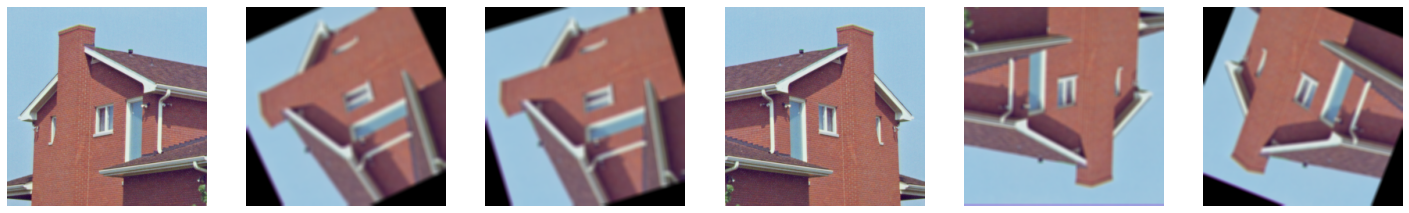

In [3]:
house = Image.open("../data/house.tiff")
house = np.asarray(house)
transform_pipeline = A.Compose(
    [
        A.Flip(p=9 / 10),
        A.Rotate(p=7 / 10, border_mode=cv.BORDER_CONSTANT, value=0),
        A.Blur(p=4 / 10),
    ]
)

fig, axs = plt.subplots(ncols=6, figsize=(25, 10))
axs[0].imshow(house)
axs[0].set_axis_off()
for ax in axs.flatten()[1:]:
    ax.set_axis_off()
    ax.imshow(transform_pipeline(image=house)["image"])

plt.show()

## Lab Work

## Final Work